In [17]:
import openmc
import openmc.deplete as od
import serpentTools
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

from plot_helpers import _load_results_helper, sup_label

rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

In [18]:
_, _, time = _load_results_helper('openmc_results/saltproc_runtime')
chain = od.Chain.from_xml('openmc_results/chain_endfb71_ace.xml')

def get_openmc_rr(step_idx):
    res = od.Results(f'openmc_results/saltproc_runtime/step_{step_idx}_data/depletion_results.h5')
    nuc_idx = chain.nuclide_dict['Th232']
    nuc = chain.nuclides[nuc_idx]
    capture_rxn_rate = []
    fission_rxn_rate = []
    for rx in nuc.reactions:
        _, R = res.get_reaction_rate('1', 'Th232', rx.type)
        if rx.type != 'fission':
            capture_rxn_rate += [R]
        else:
            fission_rxn_rate += [R]
    return np.sum(capture_rxn_rate, axis=0), np.sum(fission_rxn_rate, axis=0)
            
    
def get_serpent_rr(step_idx):
    res = serpentTools.read(f'serpent_results/saltproc_runtime/step_{step_idx}_data/runtime_input.serpent_res.m')
    capture_rxn_rate = res.resdata['th232Capt'][:,0]
    fission_rxn_rate = res.resdata['th232Fiss'][:,0]
    return capture_rxn_rate, fission_rxn_rate

In [3]:
def get_all_rates(code, max_idx):
    capture = np.array([])
    fission = np.array([])
    for i in range(0, max_idx+1):
        if code == 'openmc':
            cap, fiss = get_openmc_rr(i)
        else:
            cap, fiss = get_serpent_rr(i)
            
        capture = np.append(capture, cap)
        fission = np.append(fission, fiss)
    return capture, fission
            

In [6]:
omc_cap, omc_fiss = get_all_rates('openmc', 118)

In [4]:
spn_cap, spn_fiss = get_all_rates('serpent', 118)

SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_0_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_1_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_2_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_3_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_4_

  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_36_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_37_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_38_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_39_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures

SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_71_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_72_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_73_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_74_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/ste

  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_107_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_108_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_109_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in serpent_results/saltproc_runtime/step_110_data/runtime_input.serpent_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/fail

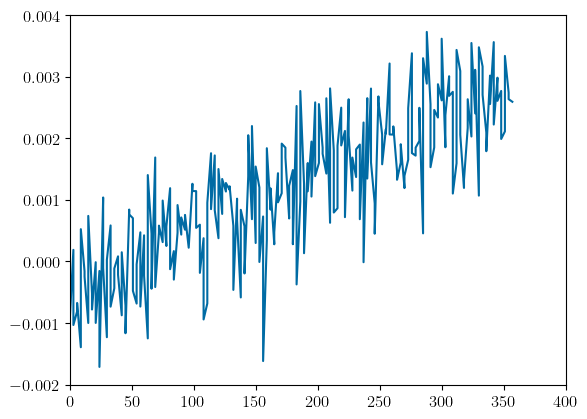

In [24]:
plt.plot(time[:-1], (omc_cap - spn_cap)/spn_cap)

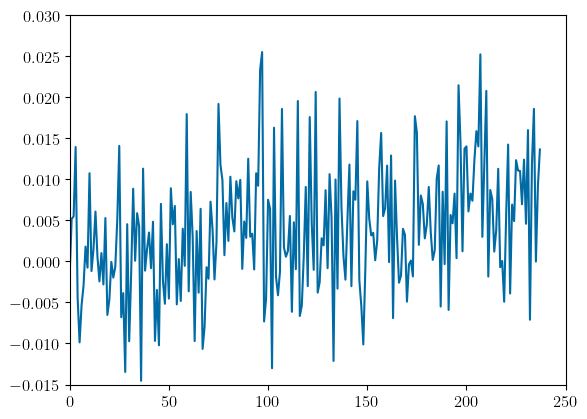

In [16]:
plt.plot((omc_fiss - spn_fiss) / spn_fiss)

In [21]:
time

array([  0.,   3.,   3.,   6.,   6.,   9.,   9.,  12.,  12.,  15.,  15.,
        18.,  18.,  21.,  21.,  24.,  24.,  27.,  27.,  30.,  30.,  33.,
        33.,  36.,  36.,  39.,  39.,  42.,  42.,  45.,  45.,  48.,  48.,
        51.,  51.,  54.,  54.,  57.,  57.,  60.,  60.,  63.,  63.,  66.,
        66.,  69.,  69.,  72.,  72.,  75.,  75.,  78.,  78.,  81.,  81.,
        84.,  84.,  87.,  87.,  90.,  90.,  93.,  93.,  96.,  96.,  99.,
        99., 102., 102., 105., 105., 108., 108., 111., 111., 114., 114.,
       117., 117., 120., 120., 123., 123., 126., 126., 129., 129., 132.,
       132., 135., 135., 138., 138., 141., 141., 144., 144., 147., 147.,
       150., 150., 153., 153., 156., 156., 159., 159., 162., 162., 165.,
       165., 168., 168., 171., 171., 174., 174., 177., 177., 180., 180.,
       183., 183., 186., 186., 189., 189., 192., 192., 195., 195., 198.,
       198., 201., 201., 204., 204., 207., 207., 210., 210., 213., 213.,
       216., 216., 219., 219., 222., 222., 225., 22